In [1]:
%load_ext autoreload
%autoreload 2
from common import *

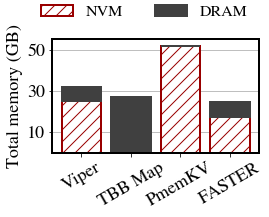

In [168]:
CONSUMPTION = {
#     "FASTER-NVM": (22.5, 2),
    "FASTER":     (17.5, 7),     
    "Viper":      (25,   7),      
    "TBB Map":    (0,   27),
    "PmemKV":     (51.7, 0),
}

fixtures, sizes = zip(*sorted(CONSUMPTION.items(), key=lambda x: x[0], reverse=True))
nvm, dram = zip(*sizes)

ind = np.arange(len(fixtures))

fig, ax = plt.subplots(1, 1, figsize=(4, 3))

ax.bar(ind, nvm, edgecolor=COLORS[0], lw=2, hatch='//', color='white')
ax.bar(ind, dram, bottom=nvm, color=COLORS[3], lw=2, edgecolor=COLORS[3])

ax.set_ylim(0, 55)
ax.set_yticks([10, 30, 50])
ax.set_yticklabels([10,30,50], fontsize=18)
ax.set_xticks(ind)
ax.set_xticklabels(fixtures, fontsize=18, rotation=30)

ax.set_ylabel("Total memory (GB)", fontsize=18)
fig.legend(loc='upper center', labels=['NVM', 'DRAM'], 
           bbox_to_anchor=(0.5, 1.05), ncol=2, frameon=False, fontsize=16)

ax.set_axisbelow(True)
ax.grid(axis='y', which='major')
fig.savefig('charts/memory.pdf', bbox_inches='tight')
fig.savefig('charts/memory.svg', bbox_inches='tight')